# **Lecture 07 - Numeric Indexing, Boolean Logic, and Subsetting**

---

<br>

## Packages

In [ ]:
# install packages for today's lecture
install.packages("dslabs")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# load the necessary packages
library(dslabs)

In [ ]:
# load murders dataset from the dslabs package
data(murders)

In [ ]:
# view the first few lines
head(murders)

,state,abb,region,population,total
,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,Alabama,AL,South,4779736,135
2,Alaska,AK,West,710231,19
3,Arizona,AZ,West,6392017,232
4,Arkansas,AR,South,2915918,93
5,California,CA,West,37253956,1257
6,Colorado,CO,West,5029196,65


<br>

<br>

---

<br>

## Subsetting Data

Thus far, we have used descriptive statistics and data visualization to preliminarily explore our dataset.

For example,

* We can extract a single column from a data frame and compute the mean

In [ ]:
# calculate average total murders across entire dataset
mean(murders$total)

[1] 184.3725

<br>

* We can plot the relationship between two variables

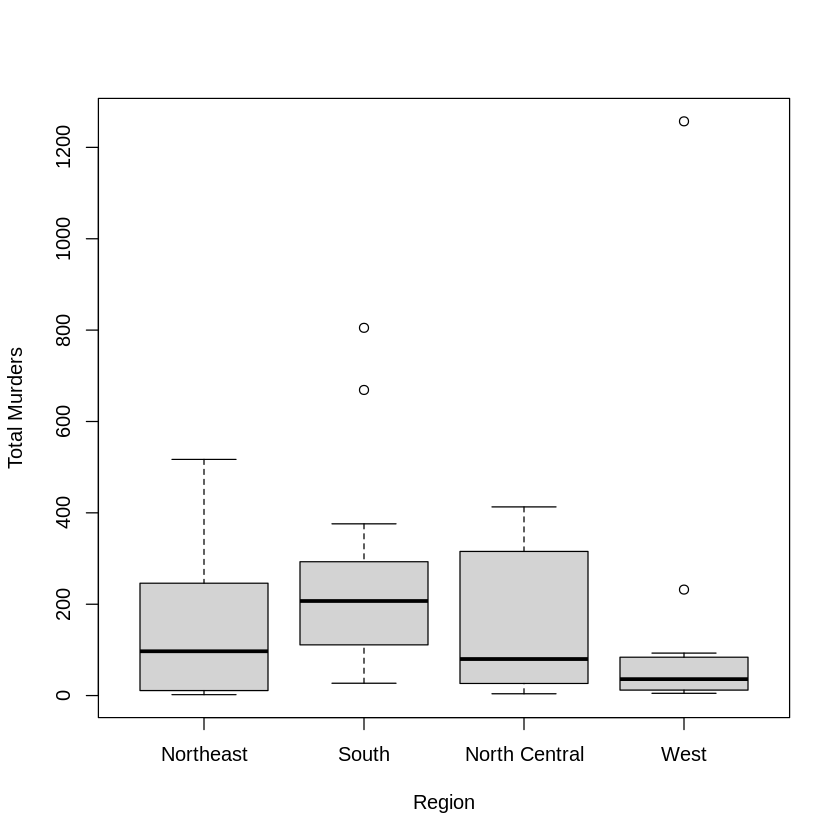

In [ ]:
# plot a boxplot of total murders by region
boxplot(murders$total ~ murders$region,
        xlab = "Region", ylab = "Total Murders")

<br>

<br>

* But what if we’re only interested in a portion or “subset” of our data?

* For example, what if we want to know the average number of murders in each region?

* What if we only want to focus on the western region?

* To do so, we must use ***“subsetting”***

<br>

* There are several approaches to subsetting data
  * numeric-based subsetting
  * Boolean-based subsetting
  * subsetting using indexing functions [e.g., `which()`]
  * subsetting by variable names

<br>

* In this lecture, we will cover
  * numeric-based subsetting
  * Boolean-based subsetting




<br>

<br>

---

<br>

## Numeric-based indexing

* The simplest form of subsetting is using indexing

* Indexing simply pulls an entry from a vector or data frame using an index (a number specifying the location of a data entry)

* The syntax for indexing is performed using
  * square brackets `[]` for vectors
  * square brackets with comma `[,]` for data frames

<br>

## Numeric-based indexing - Vectors


* Consider the vector `total` from the `murders` data frame
* We can subset the first value of a vector using indexing
* Here, we simply specify `[1]` to extract the first entry

<br>

In [ ]:
 # extract the first entry from the total column
 murders$total[1]

[1] 135

In [ ]:
# check our work
head(murders)

,state,abb,region,population,total
,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,Alabama,AL,South,4779736,135
2,Alaska,AK,West,710231,19
3,Arizona,AZ,West,6392017,232
4,Arkansas,AR,South,2915918,93
5,California,CA,West,37253956,1257
6,Colorado,CO,West,5029196,65


<br>

* We can extract multiple values at once
* We do this by specifying a vector of indexes

In [ ]:
c(1, 3, nrow(murders))

[1]  1  3 51

In [ ]:
 # extract the first, third, and last entry from the total column
 murders$total[c(1, 3, nrow(murders))]

[1] 135 232   5

In [ ]:
# check our work
tail(murders)

,state,abb,region,population,total
,<chr>,<chr>,<fct>,<dbl>,<dbl>
46,Vermont,VT,Northeast,625741,2
47,Virginia,VA,South,8001024,250
48,Washington,WA,West,6724540,93
49,West Virginia,WV,South,1852994,27
50,Wisconsin,WI,North Central,5686986,97
51,Wyoming,WY,West,563626,5


<br>

## Numeric-based indexing - Data Frames


* Indexing data frames are a bit more complicated
* Since data frames have two dimensions, rows and columns, we must use the syntax `[row_indexes, column_indexes]`
* Row indexes are specified to the ***left*** of the comma
* Column indexes are specified to the ***right*** of the comma

<br>

* We can extract the first row of the `murders` data frame by including `[1,]` to the ***left*** of the comma
* If we want all columns, we leave a blank to the right of the comma

In [ ]:
# extract the first row of the murders data frame
murders[1, ]

,state,abb,region,population,total
,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,Alabama,AL,South,4779736,135


<br>

* We can extract the first column of the `murders` data frame by including `[,1]` to the ***right*** of the comma
* If we want all the rows, we leave a blank to the left of the comma

In [ ]:
# extract the first column of the murders data frame
murders[, 1]

[1] "Alabama"              "Alaska"               "Arizona"             
 [4] "Arkansas"             "California"           "Colorado"            
 [7] "Connecticut"          "Delaware"             "District of Columbia"
[10] "Florida"              "Georgia"              "Hawaii"              
[13] "Idaho"                "Illinois"             "Indiana"             
[16] "Iowa"                 "Kansas"               "Kentucky"            
[19] "Louisiana"            "Maine"                "Maryland"            
[22] "Massachusetts"        "Michigan"             "Minnesota"           
[25] "Mississippi"          "Missouri"             "Montana"             
[28] "Nebraska"             "Nevada"               "New Hampshire"       
[31] "New Jersey"           "New Mexico"           "New York"            
[34] "North Carolina"       "North Dakota"         "Ohio"                
[37] "Oklahoma"             "Oregon"               "Pennsylvania"        
[40] "Rhode Island"         "South Carolina"       "South Dakota"        
[43] "Tennessee"            "Texas"                "Utah"                
[46] "Vermont"              "Virginia"             "Washington"          
[49] "West Virginia"        "Wisconsin"            "Wyoming"

<br>

* Indexing both rows and columns

In [ ]:
# to check our work...
head(murders)

,state,abb,region,population,total
,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,Alabama,AL,South,4779736,135
2,Alaska,AK,West,710231,19
3,Arizona,AZ,West,6392017,232
4,Arkansas,AR,South,2915918,93
5,California,CA,West,37253956,1257
6,Colorado,CO,West,5029196,65


In [ ]:
# extract the first row and first column
murders[1, 1]

[1] "Alabama"

In [ ]:
# another way to extract the first row and first column
murders$state[1]

[1] "Alabama"

<br>

In [ ]:
# extract the first row and third column
murders[1, 3]

[1] South
Levels: Northeast South North Central West

In [ ]:
# another way to extract the first row and third column
murders$region[1]

<br>

In [ ]:
# extract the fifth and sixth rows and first and third columns
murders[c(5, 6), c(1, 3)]

,state,region
,<chr>,<fct>
5,California,West
6,Colorado,West


<br>

<br>

---

<br>

## Boolean Expressions

* Subsetting using numeric indexing is very useful, but there is a problem!

* What if we don't know the indexes we need to subset?

* For example, what if we only wanted rows from the western region?

* We would need to determine which rows correspond to the states in the western region...

* We can use Boolean-based subsetting for this purpose

* But first, some background on Boolean expressions...

<br>


### Background - Logical Data Type

* Boolean-based subsetting is performed using the logical data type

* A variable of logical data type in R can be one of two values

  *   `TRUE` or `FALSE`
  *    `T` for `TRUE` or `F` for `FALSE`
  *    `1` for `TRUE` or `0` for `FALSE`

<br>

In [ ]:
# logical variable
my_true <- TRUE
my_true

<br>

In [ ]:
my_false <- FALSE
my_false

<br>

<br>

### Background - Boolean Expressions



To perform Boolean subsetting...

* We can compare quantities or character strings using Boolean expressions

* The result of these expressions is a logical



<br>

* `==` determines if two quantities or character strings are equivalent



In [ ]:
# Is 5 equal to 5?
5 == 5

[1] TRUE

In [ ]:
# Is 5 equal to 2 + 3?
5 == 2 + 3

[1] TRUE

In [ ]:
# Is 5 equal to 2 + 4?
5 == 2 + 4

[1] FALSE

In [ ]:
# comparing characters
"Hello" == "Hello"

[1] TRUE

In [ ]:
# R does not understand semantic meaning!
"Hello" == "Hi"

[1] FALSE

<br>

<br>

* `!=` determines if two quantities or character strings are NOT equivalent



In [ ]:
# Is 5 NOT equal to 2 + 3?
5 != 2 + 3

[1] FALSE

In [ ]:
# Is 5 NOT equal to 2 + 4?
5 != 2 + 4

[1] TRUE

In [ ]:
# comparing characters
"Hello" != "Hello"

[1] FALSE

In [ ]:
"Hello" != "Hi"

[1] TRUE

<br>

<br>

* `<` determines if one quantity is less than another
* `<=` determines if one quantity is less than or equal to another
* `>` determines if one quantity is greater than another
* `>=` determines if one quantity is greater than or equal to another



In [ ]:
# Is 5 less than 5?
5 < 5

[1] FALSE

In [ ]:
# Is 5 less than or equal to 5?
5 <= 5

[1] TRUE

<br>

* We can apply Boolean expressions and logic to vectors as well!

In [ ]:
# define a vector
x <- c(1, 3, 5, 7, 9)

[1] 1 3 5 7 9

<br>

* Similar to the Boolean expressions above, we can compare a vector to a value
* The expression below determines if each vector value is greater than 5

In [ ]:
# determine which values of x are greater than 5
x > 5

[1] FALSE FALSE FALSE  TRUE  TRUE

<br>

In [ ]:
# determine values that are equal to 9
x == 9

[1] FALSE FALSE FALSE FALSE  TRUE

<br>

<br>

---

<br>

## Boolean-based Subsetting - Vectors

* The result of logical comparisons with vectors results in another vector of Booleans/logicals

* Boolean-based subsetting is similar to numeric-based indexing

* We use the same `[]` syntax, except we subset using all of the `TRUE` values in the Boolean vector!

<br>

* From our prior example,

In [ ]:
# define a vector
x <- c(1, 3, 5, 7, 9)

In [ ]:
# determine which values of x are greater than 5
x > 5

[1] FALSE FALSE FALSE  TRUE  TRUE

<br>

* The following script extracts all entries of the vector `x` where the corresponding Boolean entry is `TRUE`
* That is, where values in `x` are greater than 5

In [ ]:
# subset using boolean vector
x[x > 5]

[1] 7 9

<br>

* The following script extracts all entries of the vector `x` where values in `x` are equal to 9

In [ ]:
x == 9

[1] FALSE FALSE FALSE FALSE  TRUE

In [ ]:
# subset using boolean vector
x[x == 9]

[1] 9

<br>

* Going back to our `murders` data frame, we can extract all entries from the western region

In [ ]:
# select all states in the western region
murders$region == "West"

[1] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE
[13]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[37] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
[49] FALSE FALSE  TRUE

In [ ]:
# subset using boolean vector
murders$region[murders$region == "West"]

[1] West West West West West West West West West West West West West
Levels: Northeast South North Central West

<br>

* Boolean subsetting enables us to create Boolean expressions from one vector that subsets entries from another vector

* This is the real power of Boolean subsetting!

In [ ]:
# subset using boolean vector
murders$total[murders$region == "West"]

[1]   19  232 1257   65    7   12   12   84   67   36   22   93    5

In [ ]:
# average total murders across states in the western region
mean(murders$total[murders$region == "West"])

[1] 147

<br>

<br>

---

<br>

## Boolean-based Subsetting - Data Frames

* Boolean-based subsetting for data frames in similar to numeric-based indexing for data frames

* We use the same `[,]` syntax, except we subset using all of the `TRUE` values in the Boolean vector!

<br>

* Using the same Boolean vector from above, we can extract all rows in the `murders` data frame

* Notice the `,` in the square brackets

* We place the Boolean vector to the left of the comma to extract the rows

In [ ]:
# subset all rows in western region
murders[murders$region == "West", ]

,state,abb,region,population,total
,<chr>,<chr>,<fct>,<dbl>,<dbl>
2,Alaska,AK,West,710231,19
3,Arizona,AZ,West,6392017,232
5,California,CA,West,37253956,1257
6,Colorado,CO,West,5029196,65
12,Hawaii,HI,West,1360301,7
13,Idaho,ID,West,1567582,12
27,Montana,MT,West,989415,12
29,Nevada,NV,West,2700551,84
32,New Mexico,NM,West,2059179,67


<br>

* Since we extracted entire rows, the output above is another data frame!

* This means we can extract columns as before

In [ ]:
# output of boolean is a data frame
class(murders[murders$region == "West", ])

[1] "data.frame"

In [ ]:
# extract total murders across states in western region
murders[murders$region == "West", 1]

[1] "Alaska"     "Arizona"    "California" "Colorado"   "Hawaii"    
 [6] "Idaho"      "Montana"    "Nevada"     "New Mexico" "Oregon"    
[11] "Utah"       "Washington" "Wyoming"

In [ ]:
murders[murders$region == "West", ]$total

[1]   19  232 1257   65    7   12   12   84   67   36   22   93    5

<br>

<br>

---

<br>

## Boolean-based Subsetting - Examples

* There are many ways to do the same thing!

In [ ]:
# original example
murders$total[murders$region == "West"]

[1]   19  232 1257   65    7   12   12   84   67   36   22   93    5

<br>

In [ ]:
# example on data frame
murders[murders$region == "West", ]$total

[1]   19  232 1257   65    7   12   12   84   67   36   22   93    5

<br>

In [ ]:
# pulling the 5th column
murders[murders$region == "West", 5]

[1]   19  232 1257   65    7   12   12   84   67   36   22   93    5

<br>

In [ ]:
# extract using column names
murders[murders$region == "West", names(murders) == "total"]

[1]   19  232 1257   65    7   12   12   84   67   36   22   93    5

<br>

In [ ]:
# extract column first, then subset entries
murders[,names(murders) == "total"][murders$region == "West"]

[1]   19  232 1257   65    7   12   12   84   67   36   22   93    5

<br>

<br>

<br>